In [ ]:
# Download the data csv file from https://drive.google.com/file/d/1QLvpwOV9VJL98BBSYSe1TYUuIxw7i9kH
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html
# (we will use a reduced version of the dataset)

# Upload the file using colab upload functions
from google.colab import files
uploaded = files.upload()

Saving YearPredictionMSD.csv to YearPredictionMSD (1).csv


In [3]:
# Run for mounting gdrive and not load the data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Master/ML/YearPredictionMSD.csv')
X = data.to_numpy()[:,1:]
y = data.to_numpy()[:,0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# Load the data from the file
data = pd.read_csv('YearPredictionMSD.csv')
X = data.to_numpy()[:,1:]
y = data.to_numpy()[:,0]

FileNotFoundError: ignored

In [ ]:
# Fuck you

# 1 - Data exploration

In [4]:
from sklearn.model_selection import train_test_split

n_samples = X.shape[0]
test_ratio = 10
test_samples = n_samples//test_ratio
train_samples = n_samples - test_samples

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size = test_samples, random_state=42)

[ 2.11106803e-01  3.73574729e-02 -1.34798425e-01  1.89357582e-03
  2.13096230e-02 -1.69980779e-01  9.93439880e-02 -4.04705425e-02
 -2.43019164e-02  4.05662116e-02  2.38235813e-02 -7.66515012e-02
  3.27460188e-02  8.47808097e-02 -1.31597371e-04  4.29702076e-02
  4.41162812e-02  3.25179468e-02  1.08274938e-02  9.48549505e-02
 -4.84663680e-02  5.74598736e-02  5.11701465e-02 -5.29194245e-02
  6.42796154e-02 -1.13619526e-02 -9.53510819e-03 -4.08737742e-03
  5.52966529e-02  1.60795228e-02 -6.65841736e-02  2.96868827e-02
 -8.43888967e-02  3.77464034e-02 -3.81075674e-02 -9.23499211e-02
 -3.72245180e-02  6.42266442e-02  6.73710047e-02 -1.20278279e-01
 -7.02507990e-02  1.76128155e-05 -1.57148555e-02  1.71251416e-02
  1.51306937e-02 -8.84103725e-02  9.29312273e-02 -2.18898849e-02
 -2.32771732e-02 -5.94579639e-02  2.86046354e-02 -6.31162514e-02
  7.56265613e-02 -5.12485475e-02  4.87034444e-03  2.77596653e-02
 -9.70445815e-02 -6.86769641e-03 -9.70381597e-02 -7.58856634e-02
 -2.46155339e-02 -4.86924

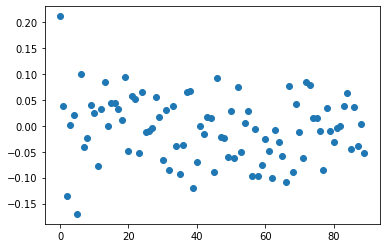

In [5]:
from matplotlib import pyplot as plt
import numpy as np

R3 = np.corrcoef(X_train,y_train,rowvar=False)

corr = R3[-1,:-1]
print(corr)
plt.scatter(range(90),corr)

# 2 - Model fitting

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [8]:
# Extract a subset of the data to work faster

X_10k = X_train[:10000]
y_10k = y_train[:10000]
print(X_10k.shape)
print(y_10k.shape)

(10000, 90)
(10000,)


## Linear regression

In [34]:
best_score = float('inf')
best_k = 0

# For several values of the k parameter
for k in range(10, X.shape[1]+1, 10):

    print("Training with PCA k =",k)

    pipe = make_pipeline(StandardScaler(), PCA(n_components=k), LinearRegression())

    print("Starting kfold...")

    scores = cross_val_score(
        pipe, X_10k, y_10k, scoring="neg_mean_squared_error", cv=5
    )
    score = -np.mean(scores)
    print("MSE:",score)

    if best_score>score:
      print("New best")
      best_score = score
      best_k = k

# end for

print()
print("Best Score:",best_score)

Training with PCA k = 10
Starting kfold...
MSE: 108.44125694148951
New best
Training with PCA k = 20
Starting kfold...
MSE: 103.92265220123099
New best
Training with PCA k = 30
Starting kfold...
MSE: 102.71560472412939
New best
Training with PCA k = 40
Starting kfold...
MSE: 102.10796656461898
New best
Training with PCA k = 50
Starting kfold...
MSE: 101.69235353577878
New best
Training with PCA k = 60
Starting kfold...
MSE: 99.51699072102548
New best
Training with PCA k = 70
Starting kfold...
MSE: 96.05986150624409
New best
Training with PCA k = 80
Starting kfold...
MSE: 91.90809747374517
New best
Training with PCA k = 90
Starting kfold...
MSE: 91.11886873261241
New best

Best Score: 91.11886873261241


In [ ]:
best_score = float('inf')
best_d = 0

# For several values of the polynomial degree
# NOTE: Crashes with degree 3
for d in range(1,3):

    print("Training with polynomial degree =",d)

    pipe = make_pipeline(PolynomialFeatures(d),StandardScaler(), LinearRegression())

    print("Starting kfold...")

    scores = cross_val_score(
        pipe, X_10k, y_10k, scoring="neg_mean_squared_error", cv=5
    )
    score = -np.mean(scores)
    print("MSE:",score)

    if best_score>score:
      print("New best")
      best_score = score
      best_d = d

# end for

print()
print("Best Score:",best_score)

Training with polynomial degree = 1
Starting kfold...
MSE: 91.1188687326124
New best
Training with polynomial degree = 2
Starting kfold...
MSE: 1718.9695813850012
Training with polynomial degree = 3
Starting kfold...
